In [1]:
import numpy as np
from signalprocess import *
from scipy import signal
from matplotlib import pyplot as plt

In [2]:
time_signal = audioread('20ho010a_1.9397_01uc0211_-1.9397.wav', samp_rate=8000)

In [3]:
time_signal.dtype, time_signal.shape

(dtype('float32'), (24160,))

In [3]:
stft_signal = stft(time_signal, size=256, shift=128, fading=False, window=signal.blackman).astype(np.complex64)

In [5]:
fade_length = len(time_signal) + 256
frames = np.ceil((fade_length - 128)/128).astype(np.int32)
frames, stft_signal.shape

(190, (188, 129))

In [6]:
recon_signal = istft(stft_signal, size=256, shift=128, fading=False, window=signal.blackman)
recon_signal.shape

(24192,)

In [7]:
frames * 128 + 128  - fade_length

32

In [8]:
sample_clip = audiowrite('tmp.wav', recon_signal, samp_rate=8000, threaded=False)
sample_clip

0

In [9]:
error = time_signal - recon_signal[0:len(time_signal)]

In [9]:
import pandas as pd

In [ ]:
pd_err = pd.Series(error)
pd_err.describe()

In [ ]:
time_signal[0]

In [ ]:
recon_signal.dtype, recon_signal.shape

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.figure()
plt.subplot(211)
plt.plot(time_signal)
plt.subplot(212)
plt.plot(recon_signal[0:len(time_signal)])
plt.show()

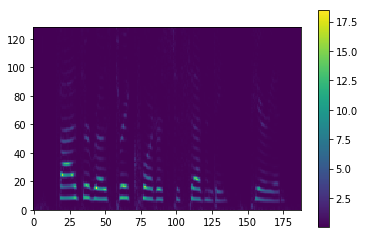

In [8]:
stft_abs = np.abs(stft_signal)
plt.imshow(stft_abs.transpose(), origin='lower')
plt.colorbar()
plt.show()

In [11]:
pd_abs = pd.Series(np.reshape(stft_abs, [-1]))
pd_abs.describe()

count    24252.000000
mean         0.284992
std          1.081261
min          0.000063
25%          0.009747
50%          0.041891
75%          0.128977
max         18.493515
dtype: float64